In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
from sklearn.decomposition import PCA
warnings.simplefilter('ignore')
matplotlib.rc('font',family = 'AppleGothic')
matplotlib.rc('axes',unicode_minus=False)
import statsmodels.api as sm
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# RIDGE 규제

In [4]:
df_raw=pd.read_csv("/Users/lee/Week3/체질검사.csv",engine="python",encoding='cp949')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## (1) 데이터 구성하기

In [5]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT",axis=1,inplace=False)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,train_size=0.7,random_state=1234)

## (2) 모델 parameter 조정

In [6]:
train_score=[]
test_score=[]
para_alpha = [n_alpha*100 for n_alpha in range(1,11)]
for v_alpha in para_alpha:
    ridge=Ridge(random_state=1234,alpha=v_alpha)
    ridge.fit(df_train_x,df_train_y)
    train_score.append(ridge.score(df_train_x,df_train_y))
    test_score.append(ridge.score(df_test_x,df_test_y))
#결과저장
df_score_alpha=pd.DataFrame()
df_score_alpha["Alpha"]=para_alpha
df_score_alpha["TrainScore"]=train_score
df_score_alpha["TestScore"]=test_score
df_score_alpha

,Alpha,TrainScore,TestScore
0,100,0.765668,0.647462
1,200,0.762709,0.639623
2,300,0.760055,0.633824
3,400,0.757602,0.629046
4,500,0.755290,0.624920
5,600,0.753081,0.621260
6,700,0.750949,0.617953
7,800,0.748879,0.614924
8,900,0.746857,0.612120
9,1000,0.744875,0.609503


## (3) 최종모델선정

In [10]:
ridge_final=Ridge(alpha=0.1,random_state=1234)
result=ridge_final.fit(df_raw_X,df_raw_y)
df_ridge=pd.DataFrame()
df_ridge["variable"]=df_raw_X.columns
df_ridge["Coef"]=pd.DataFrame(result.coef_)
df_ridge

,variable,Coef
0,AGE,0.062028
1,WEIGHT,-0.088485
2,HEIGHT,-0.069638
3,NECK,-0.470754
4,CHEST,-0.023830
5,ABDOMEN,0.954786
6,HIP,-0.207502
7,THIGH,0.236117
8,KNEE,0.015231
9,ANKLE,0.173703


## (4) 변수 중요도 확인

<AxesSubplot:>

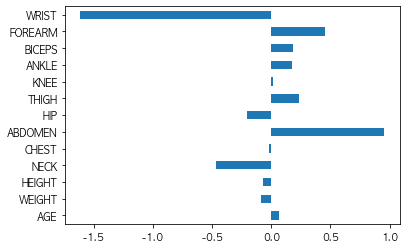

In [11]:
df_ridge_coef=pd.DataFrame({"Coef":result.coef_},index=df_raw_X.columns)
df_ridge_coef.plot.barh(y="Coef",legend=False)

# LASSO 규제

In [7]:
df_raw_y=df_raw["FAT"]
df_raw_X=df_raw.drop("FAT",axis=1,inplace=False)

df_train_X,df_test_X,df_train_y,df_test_y=train_test_split(df_raw_X,df_raw_y,train_size=0.7,random_state=1234)


## (1) 모델 parameter 조정

In [13]:
train_score=[]
test_score=[]
#알파는 규제화 강도

para_alpha = [n_alpha*0.1 for n_alpha in range(1,100)]
for v_alpha in para_alpha:
    lasso=Lasso(random_state=1234,alpha=v_alpha)
    lasso.fit(df_train_X,df_train_y)
    train_score.append(lasso.score(df_train_X,df_train_y))
    test_score.append(lasso.score(df_test_X,df_test_y))
#결과저장
df_score_alpha=pd.DataFrame()
df_score_alpha["Alpha"]=para_alpha
df_score_alpha["TrainScore"]=train_score
df_score_alpha["TestScore"]=test_score
df_score_alpha

,Alpha,TrainScore,TestScore
0,0.1,0.767715,0.660125
1,0.2,0.764683,0.652665
2,0.3,0.761041,0.643384
3,0.4,0.758957,0.641560
4,0.5,0.756907,0.641087
...,...,...,...
94,9.5,0.676241,0.602956
95,9.6,0.675936,0.602723
96,9.7,0.675627,0.602486
97,9.8,0.675315,0.602247


## (2) 최종 모델 선정

In [15]:
lasso_final=Lasso(alpha=0.1,random_state=1234)
result=lasso_final.fit(df_raw_X,df_raw_y)

df_lasso = pd.DataFrame()
df_lasso['variable']=df_raw_X.columns
df_lasso['Coef']=pd.DataFrame(result.coef_)
df_lasso

print(result.intercept_)

-22.982606181814706


## (3) 변수 중요도 확인

<AxesSubplot:>

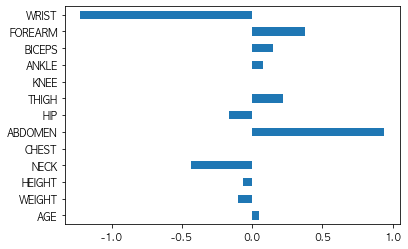

In [17]:
df_lasso_coef=pd.DataFrame({"Coef":result.coef_},index=df_raw_X.columns)
df_lasso_coef.plot.barh(y="Coef",legend=False)

# ElasticNET 규제화

## (1) 모델 parameter 조정

In [ ]:
train_score=[]
test_score=[]
#알파는 규제화 강도

para_alpha = [n_alpha*0.1 for n_alpha in range(1,100)]
for v_alpha in para_alpha:
    elastic=ElasticNET(random_state=1234,alpha=v_alpha)
    elastic.fit(df_train_X,df_train_y)
    train_score.append(elastic.score(df_train_X,df_train_y))
    test_score.append(elastic.score(df_test_X,df_test_y))
#결과저장
df_score_alpha=pd.DataFrame()
df_score_alpha["Alpha"]=para_alpha
df_score_alpha["TrainScore"]=train_score
df_score_alpha["TestScore"]=test_score
df_score_alpha

## (2) 최종 모델 선정

In [18]:
lasso_final=Lasso(alpha=0.1,random_state=1234)
result=lasso_final.fit(df_raw_X,df_raw_y)

df_lasso = pd.DataFrame()
df_lasso['variable']=df_raw_X.columns
df_lasso['Coef']=pd.DataFrame(result.coef_)
df_lasso

print(result.intercept_)

-22.982606181814706


## (3) 변수 중요도 확인

<AxesSubplot:>

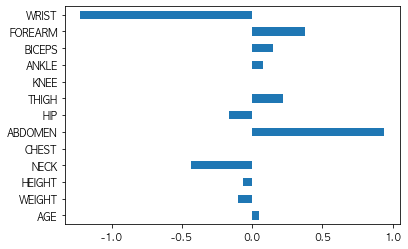

In [19]:
df_lasso_coef=pd.DataFrame({"Coef":result.coef_},index=df_raw_X.columns)
df_lasso_coef.plot.barh(y="Coef",legend=False)